In [2]:
# current strategy for ensemble: 
# all for testing set
# SWE：GoogLeNet (SWE) (0.9638)
# US：AlexNet (US) (0.9430)
# RE-SWE：ViT (0.9676)
# RE-US：DenseNet-161 (RE-US) (0.8981)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import time
from torch.utils.data import Subset
from sklearn.metrics import roc_auc_score, accuracy_score, matthews_corrcoef, recall_score, precision_score,auc
import time
from sklearn.metrics import roc_curve
import pandas as pd

In [10]:
y_test_googlenet_SWE = np.load('/root/autodl-tmp/ROC/SWE/GoogLeNet/y_test.npy')
y_test_alexnet_US = np.load('/root/autodl-tmp/ROC/US/AlexNet/y_test.npy')
y_test_vit_RE_SWE = np.load('/root/autodl-tmp/ROC/RE-SWE/ViT/y_test.npy')
y_test_denseNet_161_RE_US = np.load('/root/autodl-tmp/ROC/RE-US/DenseNet-161/y_test.npy')

y_test = y_test_googlenet_SWE

In [11]:
y_test_googlenet_SWE.reshape(-1)

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0.])

In [12]:
y_test_alexnet_US.reshape(-1)

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1.])

In [13]:
y_test_vit_RE_SWE.reshape(-1)

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1.])

In [14]:
y_test_denseNet_161_RE_US.reshape(-1)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1.])

In [15]:
y_test_pred_googlenet_SWE = np.load('/root/autodl-tmp/ROC/SWE/GoogLeNet/y_test_pred.npy')
y_test_pred_alexnet_US = np.load('/root/autodl-tmp/ROC/US/AlexNet/y_test_pred.npy')
y_test_pred_vit_RE_SWE = np.load('/root/autodl-tmp/ROC/RE-SWE/ViT/y_test_pred.npy')
y_test_pred_denseNet_161_RE_US = np.load('/root/autodl-tmp/ROC/RE-US/DenseNet-161/y_test_pred.npy')

In [16]:
### 4: SWE + US + RE-SWE + RE-US

In [17]:
y_pred1 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1) + 
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 4)
y_label = np.array(y_test)
fpr1, tpr1, _ = roc_curve(y_label, y_pred1)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.6671296296296296

In [18]:
### 3: SWE + US + RE-SWE

In [19]:
y_pred2 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1)
                   ) / 3)
y_label = np.array(y_test)
fpr2, tpr2, _ = roc_curve(y_label, y_pred2)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.7027777777777778

In [20]:
### 3: SWE + US + RE-US

In [21]:
y_pred3 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 3)
y_label = np.array(y_test)
fpr3, tpr3, _ = roc_curve(y_label, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.7074074074074075

In [22]:
### 3: SWE + RE-SWE + RE-US

In [23]:
y_pred4 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1) + 
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 3)
y_label = np.array(y_test)
fpr4, tpr4, _ = roc_curve(y_label, y_pred4)
roc_auc4 = auc(fpr4, tpr4)
roc_auc4

0.6356481481481482

In [24]:
### 3: US + RE-SWE + RE-US

In [25]:
y_pred5 = np.array((np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1) + 
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 3)
y_label = np.array(y_test)
fpr5, tpr5, _ = roc_curve(y_label, y_pred5)
roc_auc5 = auc(fpr5, tpr5)
roc_auc5

0.5189814814814815

In [26]:
### 2: SWE + US

In [27]:
y_pred6 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_alexnet_US).reshape(-1)
                   ) / 2)
y_label = np.array(y_test)
fpr6, tpr6, _ = roc_curve(y_label, y_pred6)
roc_auc6 = auc(fpr6, tpr6)
roc_auc6

0.8013888888888888

In [28]:
### 2: SWE + RE-SWE

In [29]:
y_pred7 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) + 
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1)
                   ) / 2)
y_label = np.array(y_test)
fpr7, tpr7, _ = roc_curve(y_label, y_pred7)
roc_auc7 = auc(fpr7, tpr7)
roc_auc7

0.6842592592592593

In [30]:
### 2: SWE + RE-US

In [31]:
y_pred8 = np.array((np.array(y_test_pred_googlenet_SWE).reshape(-1) +
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 2)
y_label = np.array(y_test)
fpr8, tpr8, _ = roc_curve(y_label, y_pred8)
roc_auc8 = auc(fpr8, tpr8)
roc_auc8

0.7092592592592593

In [32]:
### 2: US + RE-SWE

In [33]:
y_pred9 = np.array((np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_vit_RE_SWE).reshape(-1)
                   ) / 2)
y_label = np.array(y_test)
fpr9, tpr9, _ = roc_curve(y_label, y_pred9)
roc_auc9 = auc(fpr9, tpr9)
roc_auc9

0.5078703703703704

In [34]:
### 2: US + RE-US

In [35]:
y_pred10 = np.array((np.array(y_test_pred_alexnet_US).reshape(-1) +
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 2)

y_label = np.array(y_test)
fpr10, tpr10, _ = roc_curve(y_label, y_pred10)
roc_auc10 = auc(fpr10, tpr10)
roc_auc10

0.5541666666666667

In [36]:
### 2: RE-SWE + RE-US

In [37]:
y_pred11 = np.array((np.array(y_test_pred_vit_RE_SWE).reshape(-1) + 
                   np.array(y_test_pred_denseNet_161_RE_US).reshape(-1)
                   ) / 2)
y_label = np.array(y_test)
fpr11, tpr11, _ = roc_curve(y_label, y_pred11)
roc_auc11 = auc(fpr11, tpr11)
roc_auc11

0.4722222222222222

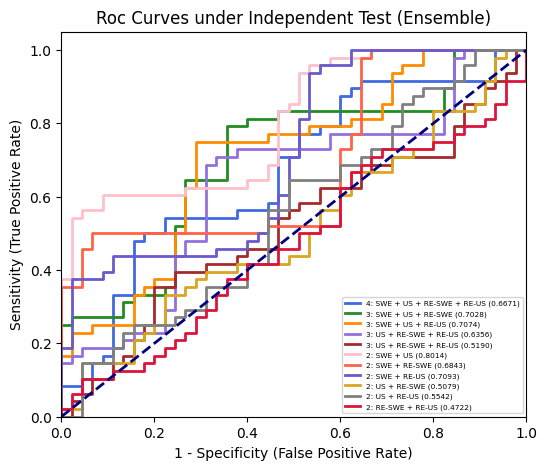

In [38]:
plt.figure(figsize=(6, 5))
lw = 2

plt.plot(
    fpr1,
    tpr1,
    color="royalblue",
    lw=lw,
    label=f"4: SWE + US + RE-SWE + RE-US ({roc_auc1:.4f})"
)

plt.plot(
    fpr2,
    tpr2,
    color="forestgreen",
    lw=lw,
    label=f"3: SWE + US + RE-SWE ({roc_auc2:.4f})"
)

plt.plot(
    fpr3,
    tpr3,
    color="darkorange",
    lw=lw,
    label=f"3: SWE + US + RE-US ({roc_auc3:.4f})"
)

plt.plot(
    fpr4,
    tpr4,
    color="mediumpurple",
    lw=lw,
    label=f"3: US + RE-SWE + RE-US ({roc_auc4:.4f})"
)

plt.plot(
    fpr5,
    tpr5,
    color="brown",
    lw=lw,
    label=f"3: US + RE-SWE + RE-US ({roc_auc5:.4f})"
)

plt.plot(
    fpr6,
    tpr6,
    color="pink",
    lw=lw,
    label=f"2: SWE + US ({roc_auc6:.4f})"
)

plt.plot(
    fpr7,
    tpr7,
    color="tomato",
    lw=lw,
    label=f"2: SWE + RE-SWE ({roc_auc7:.4f})"
)

plt.plot(
    fpr8,
    tpr8,
    color="slateblue", 
    lw=lw,
    label=f"2: SWE + RE-US ({roc_auc8:.4f})"
)

plt.plot(
    fpr9,
    tpr9,
    color="goldenrod", 
    lw=lw,
    label=f"2: US + RE-SWE ({roc_auc9:.4f})"
)

plt.plot(
    fpr10,
    tpr10,
    color="grey",  
    lw=lw,
    label=f"2: US + RE-US ({roc_auc10:.4f})"
)

plt.plot(
    fpr11,
    tpr11,
    color="crimson", 
    lw=lw,
    label=f"2: RE-SWE + RE-US ({roc_auc11:.4f})"
)

# font1 = {'family' : 'Arial',
# 'weight' : 'bold',
# 'size' : 15,
# }
# font2 = {'family' : 'Arial',
# 'weight' : 'normal',
# 'size' : 13,
# }

# 安装microsoft字体, 包含Arial（in linux）
# sudo apt-get install ttf-mscorefonts-installer
# sudo fc-cache -fv
# cd /root/.cache/matplotlib
# rm fontlist-v330.json

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel("1 - Specificity (False Positive Rate)", font2)
plt.xlabel("1 - Specificity (False Positive Rate)") # findfont: Font family 'Arial' not found.

#plt.ylabel("Sensitivity (True Positive Rate)", font2)
plt.ylabel("Sensitivity (True Positive Rate)")

#plt.title("Roc Curves under Independent Test (Ensemble)", font1)
plt.title("Roc Curves under Independent Test (Ensemble)")

plt.legend(loc="lower right", prop={'size': 5.3})  # 使用具体的数值设置 #xx-small -> 6pt
plt.savefig('/root/autodl-tmp/ROC/Ensemble/ensemble.svg', format='svg')

In [39]:
data = np.column_stack((
    y_test,
    y_pred1,
    y_pred2,
    y_pred3,
    y_pred4,
    y_pred5,
    y_pred6,
    y_pred7,
    y_pred8,
    y_pred9,
    y_pred10,
    y_pred11
))

header = (
    'y, '
    '4: SWE + US + RE-SWE + RE-US, '
    '3: SWE + US + RE-SWE, '
    '3: SWE + US + RE-US, '
    '3: SWE + RE-SWE + RE-US, '
    '3: US) + RE-SWE + RE-US, '
    '2: SWE + US, '
    '2: SWE + RE-SWE, '
    '2: SWE + RE-US, '
    '2: US + RE-SWE, '
    '2: US + RE-US, '
    '2: RE-SWE + RE-US'
)

np.savetxt(
    'ROC4Ensemble.csv',
    data,
    delimiter=',',
    header=header,
    comments=''
)
